# phase1.5_result_analyze

2017-05-26

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime,timedelta,date,time
import copy

In [2]:
%matplotlib inline

### 录入目标数据

In [3]:
travel_time_targets = pd.read_csv('/home/godcedric/GitLocal/KDDCUP2017/待加工数据集/18_25号时间窗数据/phase1_target_values_travel_time.csv')
volume_targets = pd.read_csv('/home/godcedric/GitLocal/KDDCUP2017/待加工数据集/18_25号时间窗数据/phase1_target_values_volume.csv')

In [11]:
travel_time_targets

,intersection_id,tollgate_id,time_window,avg_travel_time
0,A,2,"[2016-10-18 08:00:00,2016-10-18 08:20:00)",77.77
1,A,2,"[2016-10-18 08:20:00,2016-10-18 08:40:00)",70.30
2,A,2,"[2016-10-18 08:40:00,2016-10-18 09:00:00)",77.68
3,A,2,"[2016-10-18 09:00:00,2016-10-18 09:20:00)",79.28
4,A,2,"[2016-10-18 09:20:00,2016-10-18 09:40:00)",83.27
5,A,2,"[2016-10-18 09:40:00,2016-10-18 10:00:00)",77.67
6,A,2,"[2016-10-18 17:00:00,2016-10-18 17:20:00)",75.00
7,A,2,"[2016-10-18 17:20:00,2016-10-18 17:40:00)",63.30
8,A,2,"[2016-10-18 17:40:00,2016-10-18 18:00:00)",68.39
9,A,2,"[2016-10-18 18:00:00,2016-10-18 18:20:00)",88.83


In [12]:
# 自定义评分函数
def MAPE(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

### 较优volume结果分析

In [13]:
time_predict = pd.read_csv('/home/godcedric/GitLocal/KDDCUP2017/submission_result/phase1.5/mean1.5/2小时修正_系数/travel_time_submission.csv')
volume_predict = pd.read_csv('/home/godcedric/下载/submission_volume_list10.csv')

volume_predict['start_time'] = volume_predict['time_window'].map(lambda x: datetime.strptime(x.split(',')[0][1:],'%Y-%m-%d %H:%M:%S'))
volume_predict = volume_predict.sort_values(by = ['tollgate_id', 'direction','start_time'])
volume_predict.index = np.arange(len(volume_predict))
del volume_predict['start_time']

FileNotFoundError: File b'/home/godcedric/\xe4\xb8\x8b\xe8\xbd\xbd/submission_volume_list10.csv' does not exist

In [14]:
volume_predict

,tollgate_id,time_window,direction,volume
0,1,"[2016-10-18 08:00:00,2016-10-18 08:20:00)",0,43.89
1,1,"[2016-10-18 08:20:00,2016-10-18 08:40:00)",0,49.29
2,1,"[2016-10-18 08:40:00,2016-10-18 09:00:00)",0,47.19
3,1,"[2016-10-18 09:00:00,2016-10-18 09:20:00)",0,50.59
4,1,"[2016-10-18 09:20:00,2016-10-18 09:40:00)",0,49.39
5,1,"[2016-10-18 09:40:00,2016-10-18 10:00:00)",0,47.09
6,1,"[2016-10-18 17:00:00,2016-10-18 17:20:00)",0,44.13
7,1,"[2016-10-18 17:20:00,2016-10-18 17:40:00)",0,34.13
8,1,"[2016-10-18 17:40:00,2016-10-18 18:00:00)",0,26.83
9,1,"[2016-10-18 18:00:00,2016-10-18 18:20:00)",0,25.13


In [15]:
temp1 = pd.merge(time_predict, travel_time_targets, on=['intersection_id','tollgate_id','time_window'], how='left') 
temp2 = pd.merge(volume_predict, volume_targets, on=['tollgate_id','direction','time_window'], how='left')
temp1.columns = ['intersection_id', 'tollgate_id', 'time_window', 'predict', 'true_value']
temp2.columns = ['tollgate_id', 'time_window', 'direction', 'predict', 'true_value']

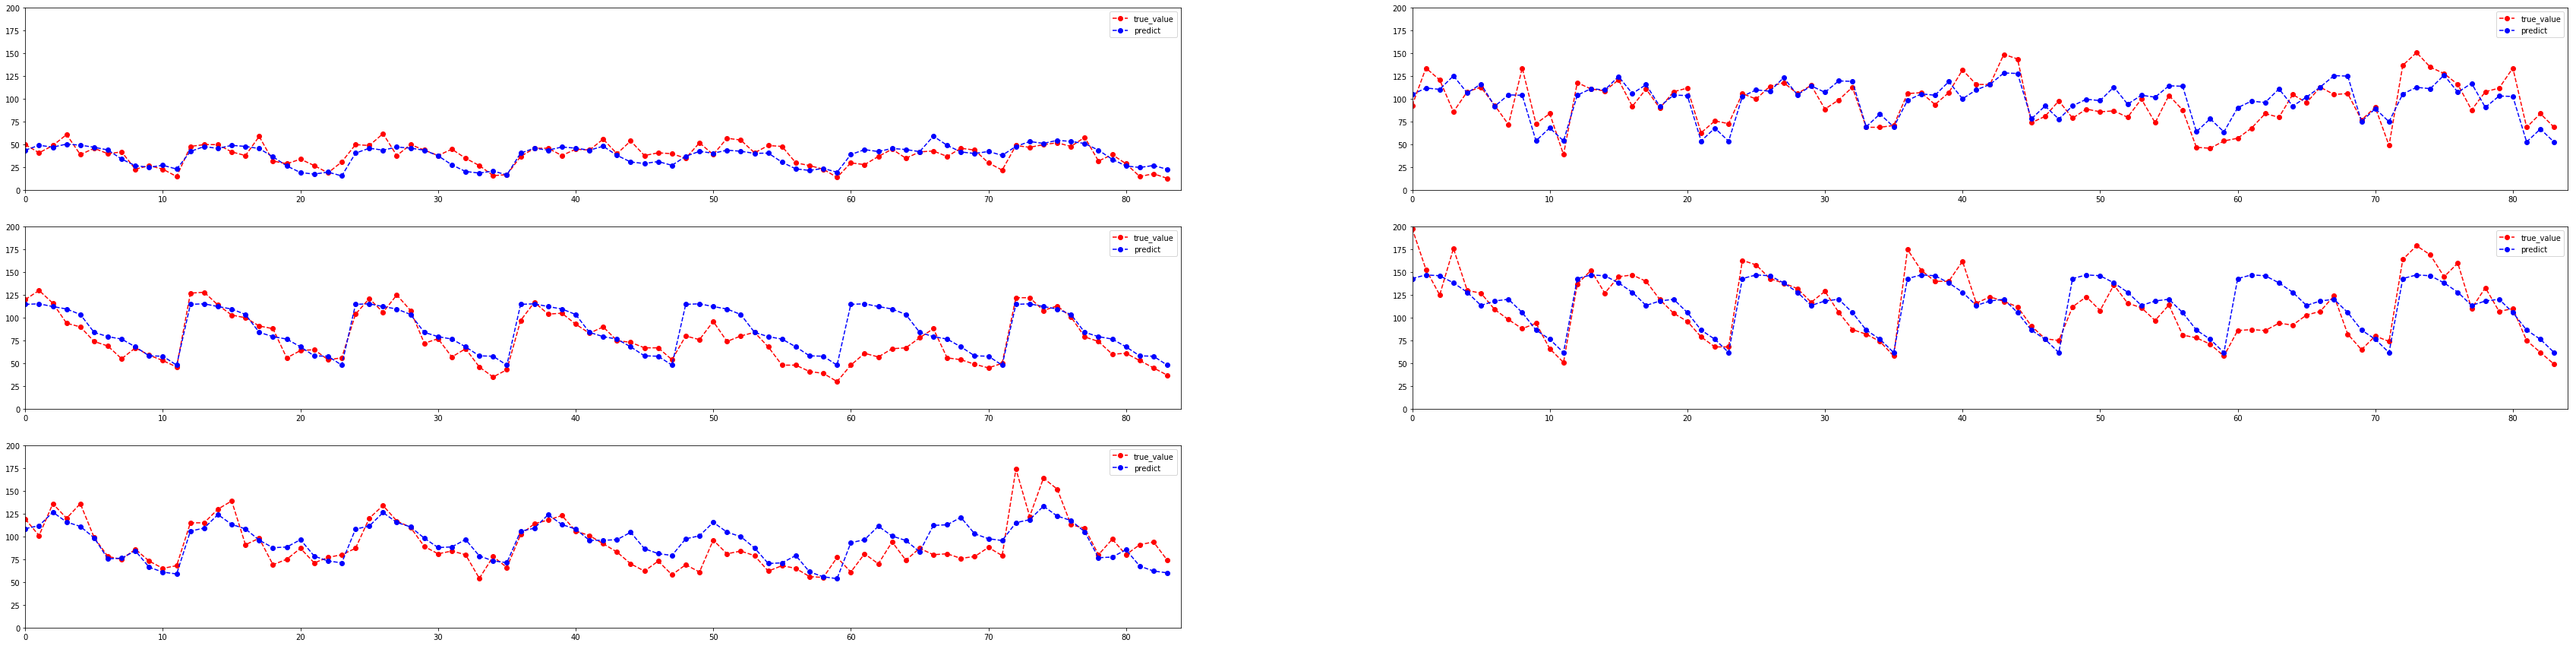

In [16]:
temp = temp2.groupby(['tollgate_id', 'direction'])

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(60)
k = 1
for (k1,k2), group in temp:
    ax = fig.add_subplot(3,2,k)
    k += 1
    ax.plot(np.arange(len(group)), group['true_value'],'r--o', label='true_value')
    ax.plot(np.arange(len(group)), group['predict'],'b--o', label='predict')
    ax.set_xlim([0, 84])
    ax.set_ylim([0, 200])
    ax.legend()    

In [17]:
# 计算MAPE
temp = temp2.groupby(['tollgate_id', 'direction'])
for (k1,k2), group in temp:
    print(k1,k2)
    mape = MAPE(group['true_value'], group['predict'])
    print(mape)

1 0
0.20383528593385083
1 1
0.16054742139764455
2 0
0.20675327594605367
3 0
0.1437966392207549
3 1
0.164905242059385


### 取均值结果分析

In [18]:
time_predict = pd.read_csv('/home/godcedric/GitLocal/KDDCUP2017/submission_result/phase1.5/mean1.5/2小时修正_系数/travel_time_submission.csv')
volume_predict = pd.read_csv('/home/godcedric/GitLocal/KDDCUP2017/submission_result/phase1.5/mean1.5/2小时修正_系数/volume_submission.csv')

temp1 = pd.merge(time_predict, travel_time_targets, on=['intersection_id','tollgate_id','time_window'], how='left') 
temp2 = pd.merge(volume_predict, volume_targets, on=['tollgate_id','direction','time_window'], how='left')
temp1.columns = ['intersection_id', 'tollgate_id', 'time_window', 'predict', 'true_value']
temp2.columns = ['tollgate_id', 'time_window', 'direction', 'predict', 'true_value']

In [19]:
travel_time_targets

,intersection_id,tollgate_id,time_window,avg_travel_time
0,A,2,"[2016-10-18 08:00:00,2016-10-18 08:20:00)",77.77
1,A,2,"[2016-10-18 08:20:00,2016-10-18 08:40:00)",70.30
2,A,2,"[2016-10-18 08:40:00,2016-10-18 09:00:00)",77.68
3,A,2,"[2016-10-18 09:00:00,2016-10-18 09:20:00)",79.28
4,A,2,"[2016-10-18 09:20:00,2016-10-18 09:40:00)",83.27
5,A,2,"[2016-10-18 09:40:00,2016-10-18 10:00:00)",77.67
6,A,2,"[2016-10-18 17:00:00,2016-10-18 17:20:00)",75.00
7,A,2,"[2016-10-18 17:20:00,2016-10-18 17:40:00)",63.30
8,A,2,"[2016-10-18 17:40:00,2016-10-18 18:00:00)",68.39
9,A,2,"[2016-10-18 18:00:00,2016-10-18 18:20:00)",88.83


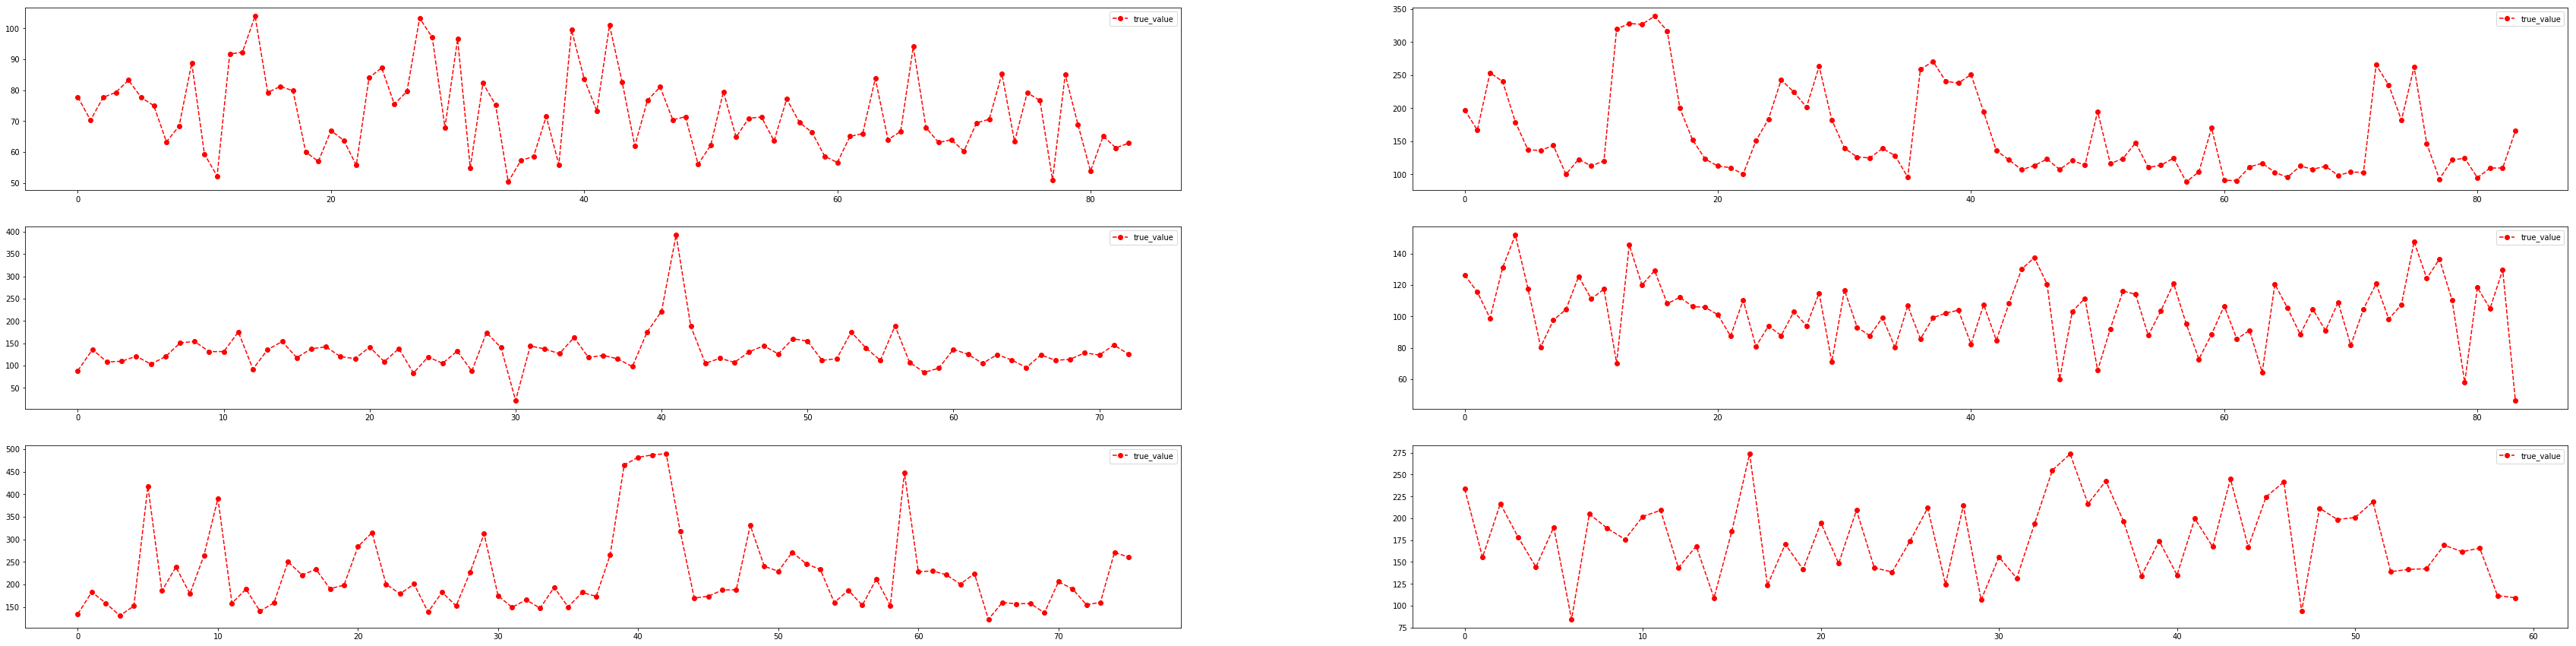

In [24]:
temp = temp1.groupby(['intersection_id', 'tollgate_id'])

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(60)
k = 1
for (k1,k2), group in temp:
    ax = fig.add_subplot(3,2,k)
    k += 1
    ax.plot(np.arange(len(group)), group['true_value'],'r--o', label='true_value')
    #ax.plot(np.arange(len(group)), group['predict'],'b--o', label='predict')
    ax.legend()    

In [21]:
# 计算MAPE
temp1 = temp1.dropna()

temp = temp1.groupby(['intersection_id', 'tollgate_id'])
for (k1,k2), group in temp:
    print(k1,k2)
    mape = MAPE(group['true_value'], group['predict'])
    print(mape)

A 2
0.13328848815418773
A 3
0.23620764191175295
B 1
0.26640790540489456
B 3
0.17874210876882785
C 1
0.2304919601850725
C 3
0.26111111410779675


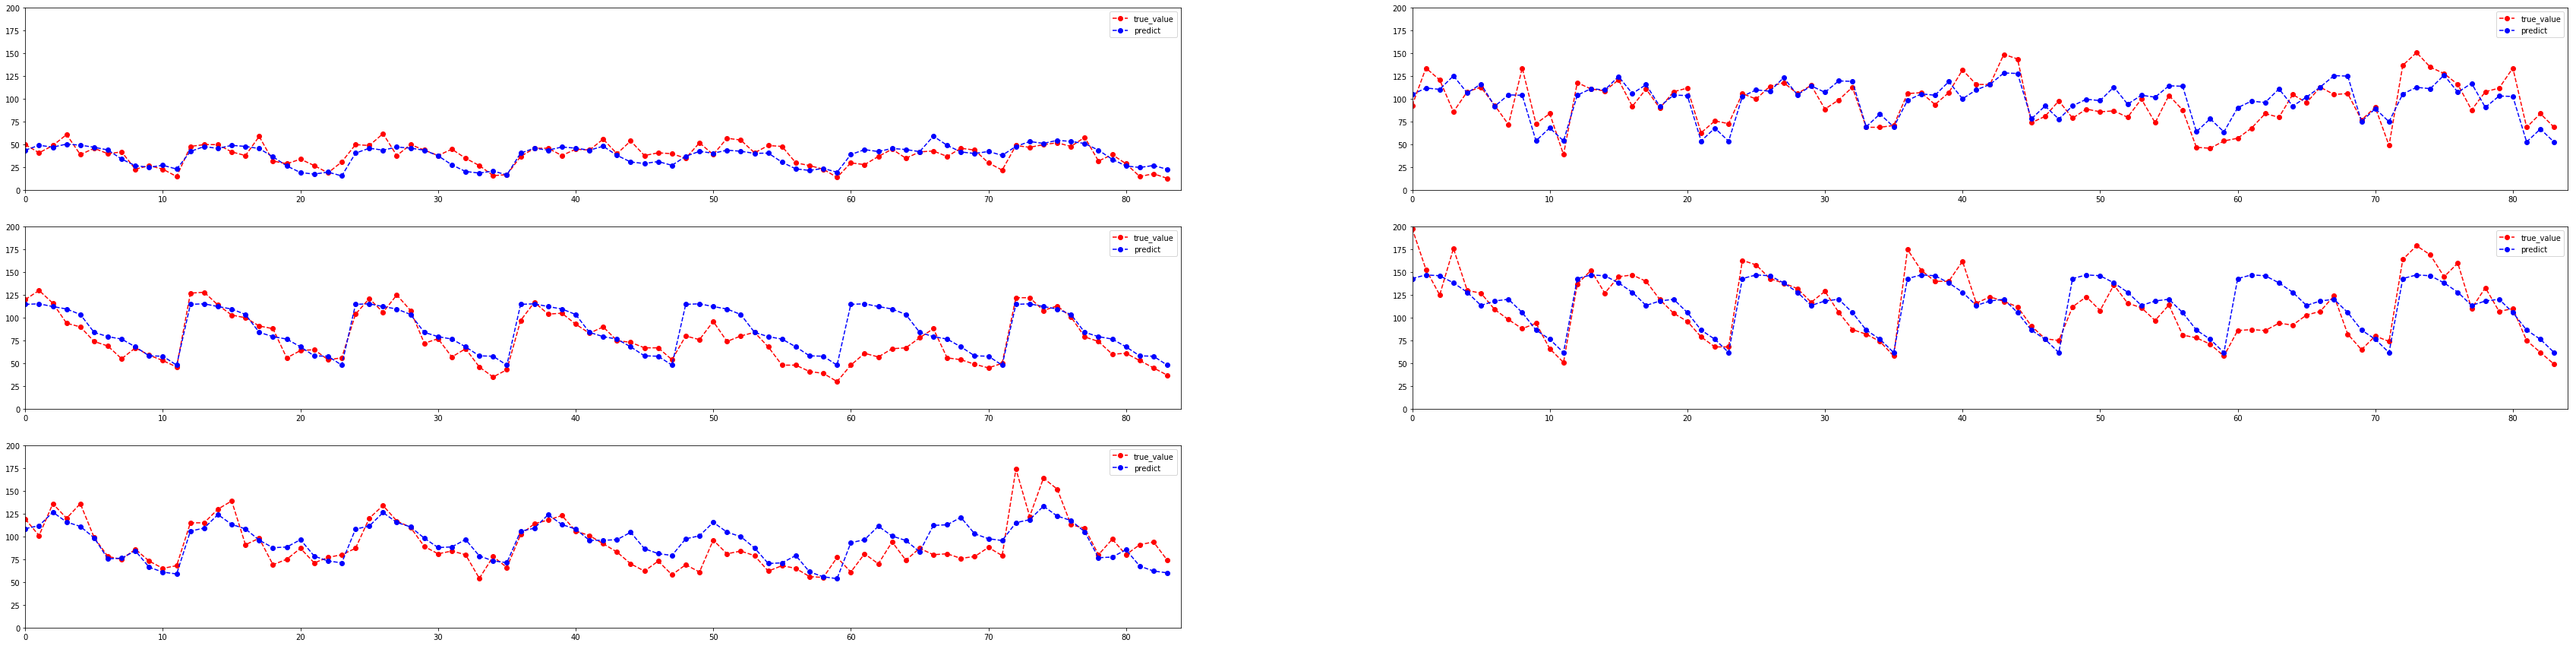

In [22]:
temp = temp2.groupby(['tollgate_id', 'direction'])

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(60)
k = 1
for (k1,k2), group in temp:
    ax = fig.add_subplot(3,2,k)
    k += 1
    ax.plot(np.arange(len(group)), group['true_value'],'r--o', label='true_value')
    ax.plot(np.arange(len(group)), group['predict'],'b--o', label='predict')
    ax.set_xlim([0, 84])
    ax.set_ylim([0, 200])
    ax.legend()    

In [23]:
# 计算MAPE
temp = temp2.groupby(['tollgate_id', 'direction'])
for (k1,k2), group in temp:
    print(k1,k2)
    mape = MAPE(group['true_value'], group['predict'])
    print(mape)

1 0
0.20383528593385083
1 1
0.16054742139764455
2 0
0.20675327594605367
3 0
0.1437966392207549
3 1
0.164905242059385


### xgboost结果分析

#### 非独热

In [52]:
time_predict = pd.read_csv('/home/godcedric/GitLocal/KDDCUP2017/submission_result/phase1.5/xgboost/非独热结果/travel_time_submission.csv')
volume_predict = pd.read_csv('/home/godcedric/GitLocal/KDDCUP2017/submission_result/phase1.5/xgboost/非独热结果/volume_submission.csv')

temp1 = pd.merge(time_predict, travel_time_targets, on=['intersection_id','tollgate_id','time_window'], how='left') 
temp2 = pd.merge(volume_predict, volume_targets, on=['tollgate_id','direction','time_window'], how='left')
temp1.columns = ['intersection_id', 'tollgate_id', 'time_window', 'predict', 'true_value']
temp2.columns = ['tollgate_id', 'time_window', 'direction', 'predict', 'true_value']

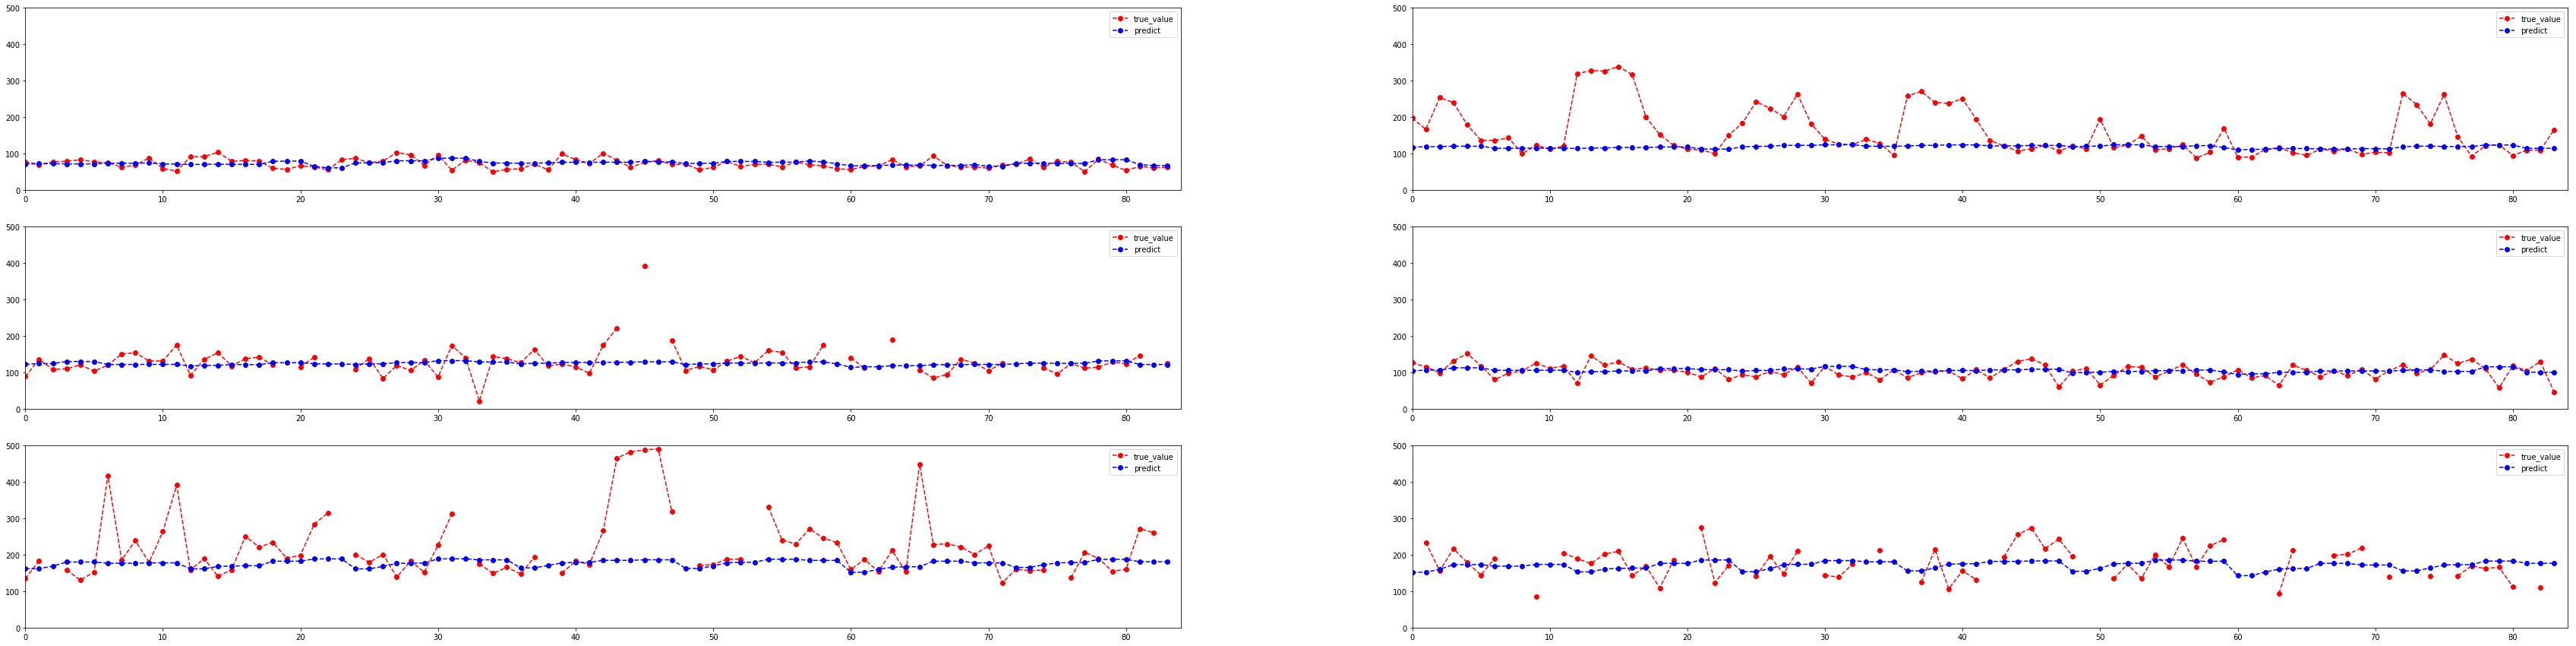

In [53]:
#temp1 = temp1.fillna(0)
temp = temp1.groupby(['intersection_id', 'tollgate_id'])

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(60)
k = 1
for (k1,k2), group in temp:
    ax = fig.add_subplot(3,2,k)
    k += 1
    ax.plot(np.arange(len(group)), group['true_value'],'r--o', label='true_value')
    ax.plot(np.arange(len(group)), group['predict'],'b--o', label='predict')
    ax.set_xlim([0, 84])
    ax.set_ylim([0, 500])
    ax.legend()    

In [54]:
# 计算MAPE
temp1 = temp1.dropna()

temp = temp1.groupby(['intersection_id', 'tollgate_id'])
for (k1,k2), group in temp:
    print(k1,k2)
    mape = MAPE(group['true_value'], group['predict'])
    print(mape)

A 2
0.1516266321831788
A 3
0.23460111639775885
B 1
0.2290545804163431
B 3
0.17724867406655564
C 1
0.2163895974132867
C 3
0.23296683044440958


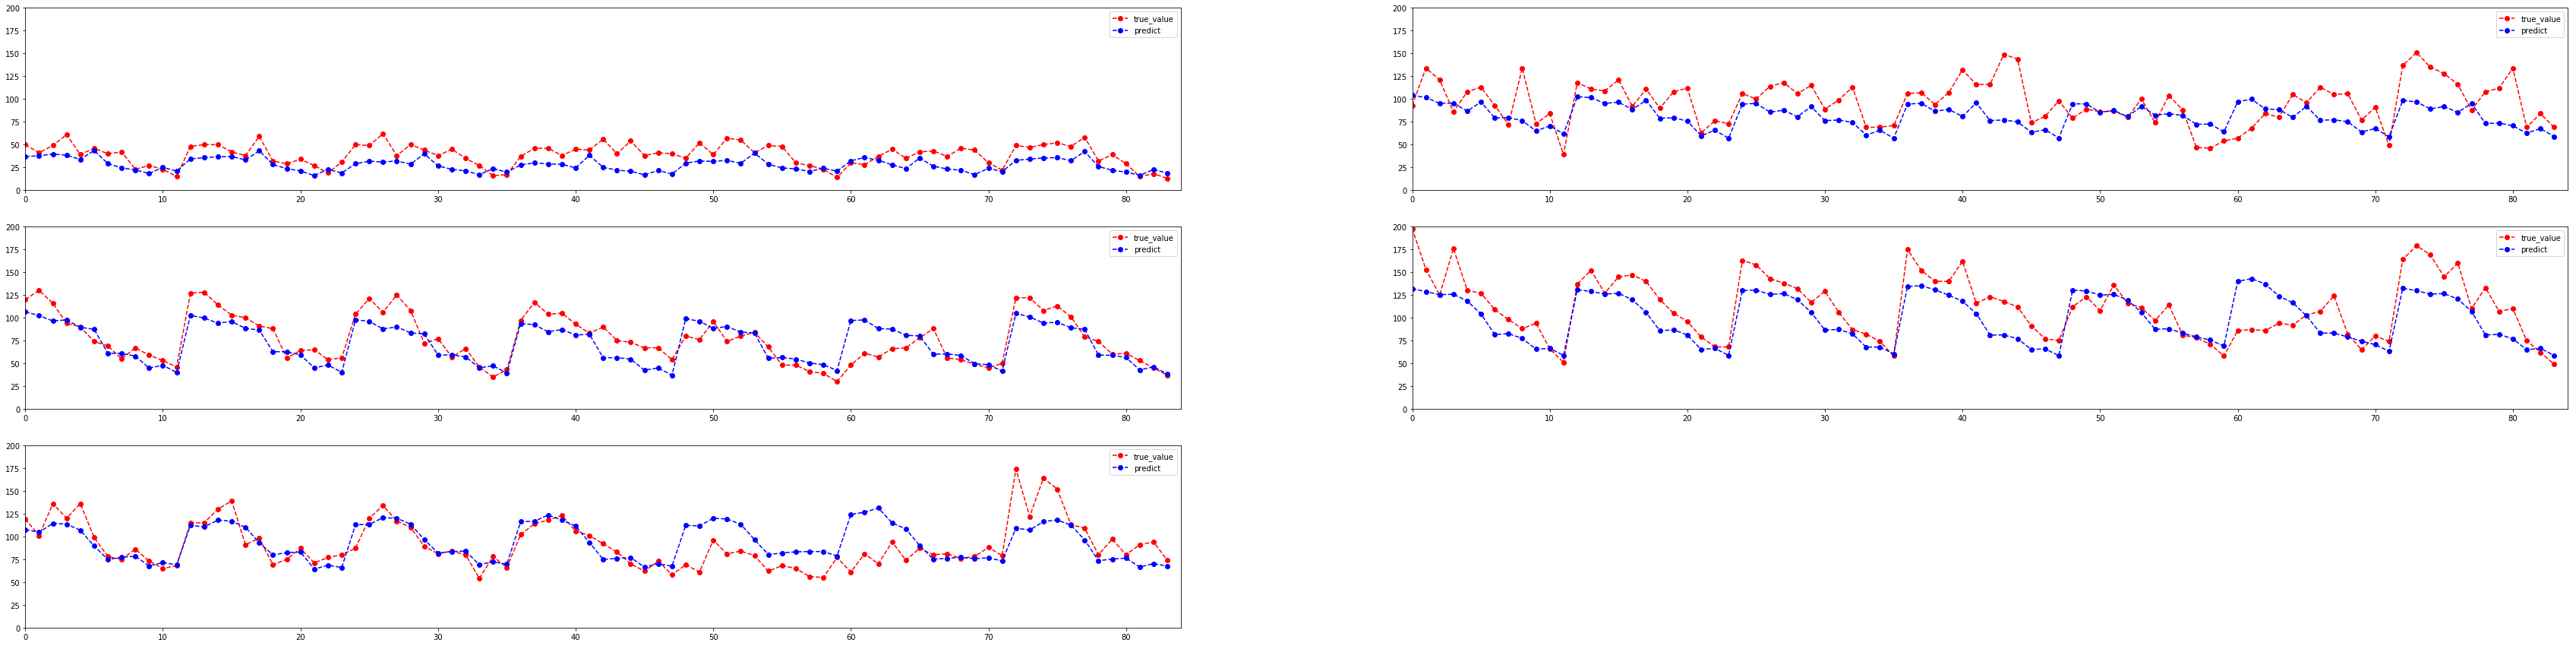

In [55]:
temp = temp2.groupby(['tollgate_id', 'direction'])

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(60)
k = 1
for (k1,k2), group in temp:
    ax = fig.add_subplot(3,2,k)
    k += 1
    ax.plot(np.arange(len(group)), group['true_value'],'r--o', label='true_value')
    ax.plot(np.arange(len(group)), group['predict'],'b--o', label='predict')
    ax.set_xlim([0, 84])
    ax.set_ylim([0, 200])
    ax.legend()    

In [56]:
# 计算MAPE
temp = temp2.groupby(['tollgate_id', 'direction'])
for (k1,k2), group in temp:
    print(k1,k2)
    mape = MAPE(group['true_value'], group['predict'])
    print(mape)

1 0
0.30255884389000354
1 1
0.2138107176331062
2 0
0.18097470334679802
3 0
0.17763998257317098
3 1
0.17333785701363408


#### 独热

In [57]:
time_predict = pd.read_csv('/home/godcedric/GitLocal/KDDCUP2017/submission_result/phase1.5/xgboost/独热结果/travel_time_submission.csv')
volume_predict = pd.read_csv('/home/godcedric/GitLocal/KDDCUP2017/submission_result/phase1.5/xgboost/独热结果/volume_submission.csv')

temp1 = pd.merge(time_predict, travel_time_targets, on=['intersection_id','tollgate_id','time_window'], how='left') 
temp2 = pd.merge(volume_predict, volume_targets, on=['tollgate_id','direction','time_window'], how='left')
temp1.columns = ['intersection_id', 'tollgate_id', 'time_window', 'predict', 'true_value']
temp2.columns = ['tollgate_id', 'time_window', 'direction', 'predict', 'true_value']

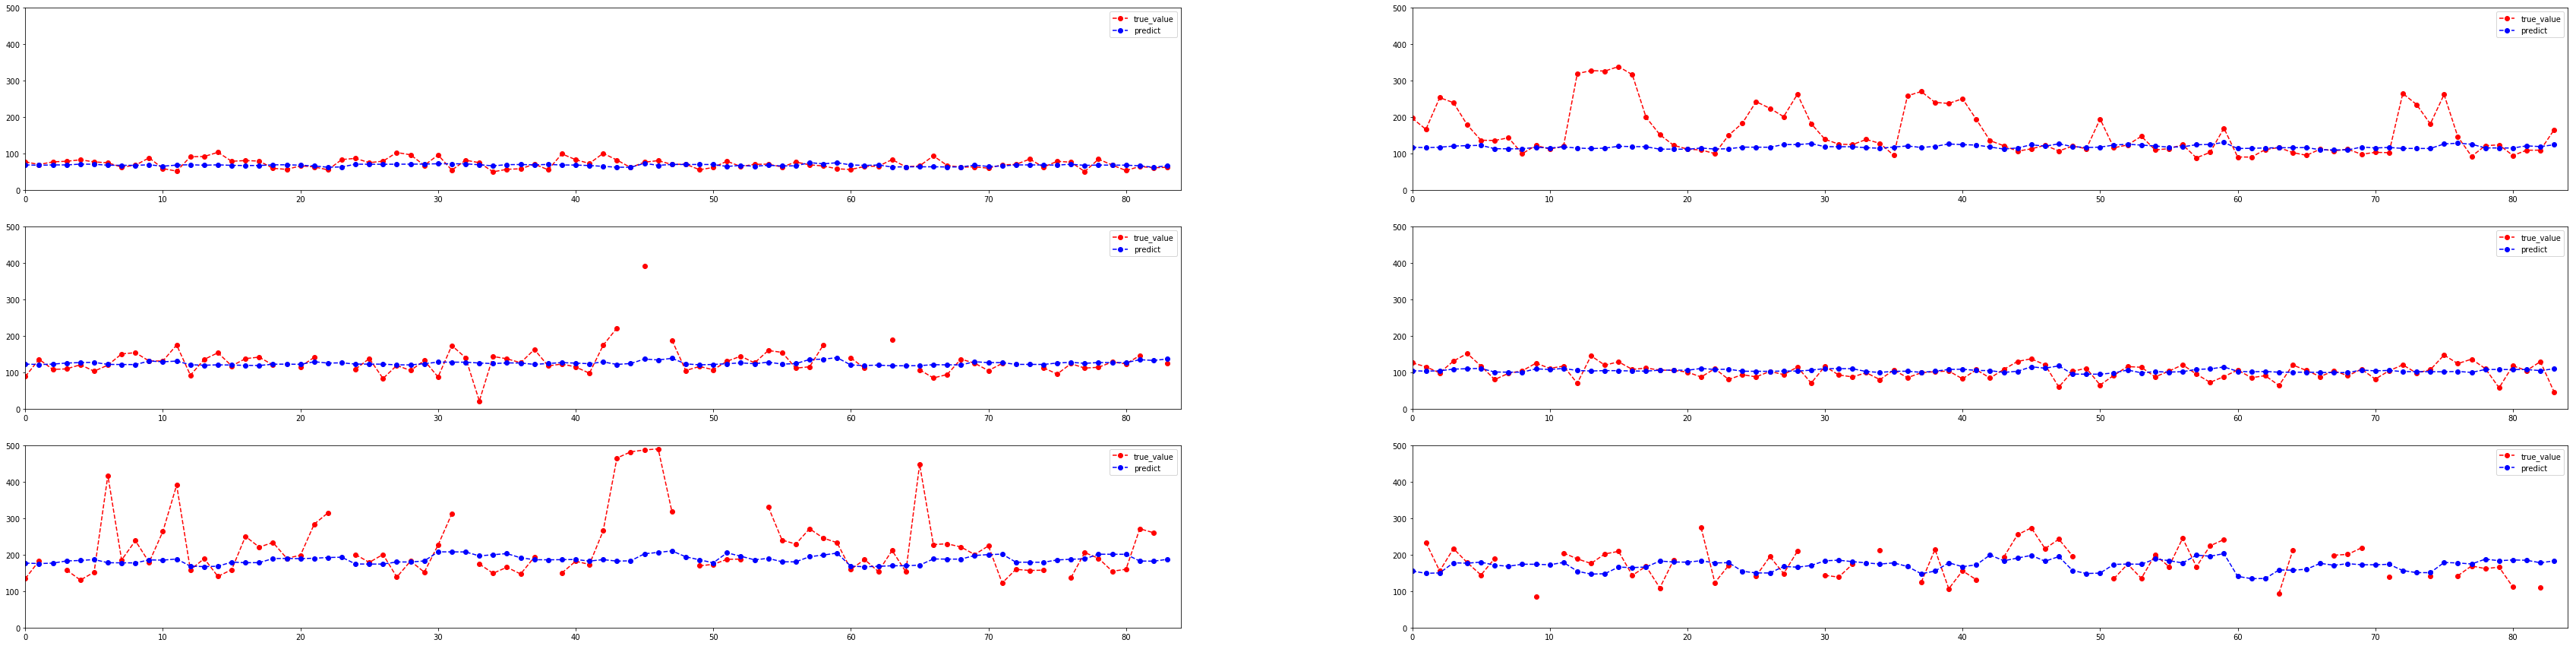

In [58]:
#temp1 = temp1.fillna(0)
temp = temp1.groupby(['intersection_id', 'tollgate_id'])

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(60)
k = 1
for (k1,k2), group in temp:
    ax = fig.add_subplot(3,2,k)
    k += 1
    ax.plot(np.arange(len(group)), group['true_value'],'r--o', label='true_value')
    ax.plot(np.arange(len(group)), group['predict'],'b--o', label='predict')
    ax.set_xlim([0, 84])
    ax.set_ylim([0, 500])
    ax.legend()    

In [59]:
# 计算MAPE
temp1 = temp1.dropna()

temp = temp1.groupby(['intersection_id', 'tollgate_id'])
for (k1,k2), group in temp:
    print(k1,k2)
    mape = MAPE(group['true_value'], group['predict'])
    print(mape)

A 2
0.13856809392862654
A 3
0.24174771540636616
B 1
0.2199657208479923
B 3
0.17748846810916882
C 1
0.220086663428988
C 3
0.22982829516438893


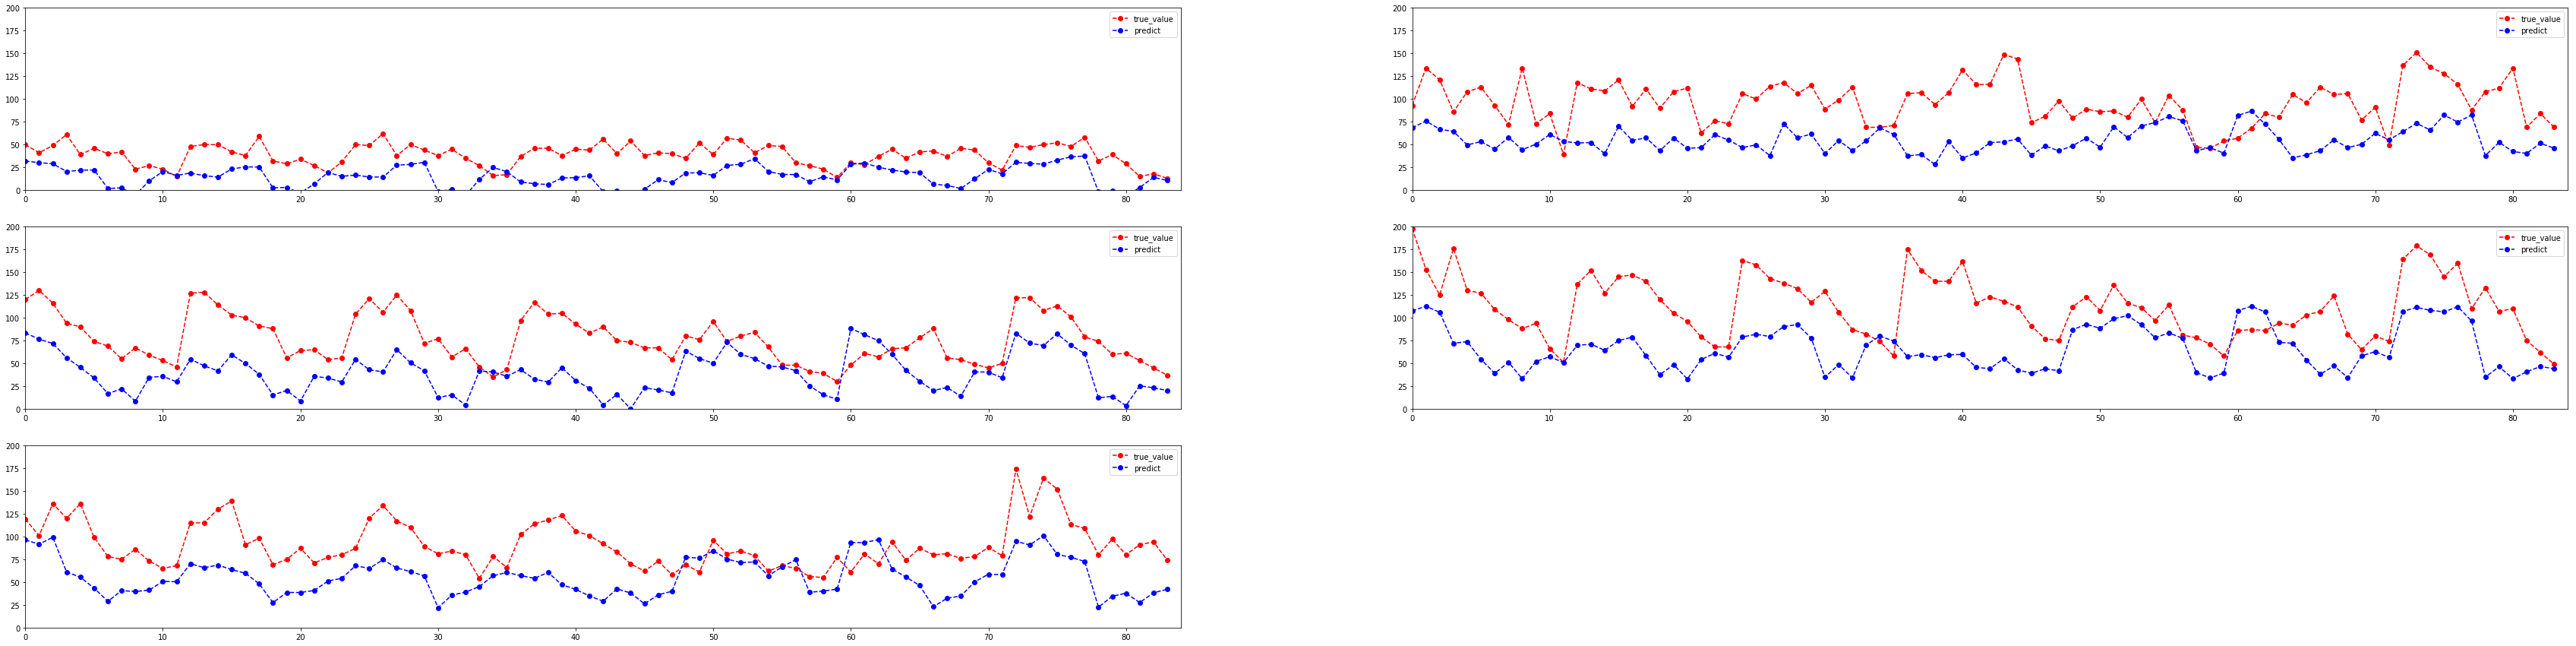

In [60]:
temp = temp2.groupby(['tollgate_id', 'direction'])

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(60)
k = 1
for (k1,k2), group in temp:
    ax = fig.add_subplot(3,2,k)
    k += 1
    ax.plot(np.arange(len(group)), group['true_value'],'r--o', label='true_value')
    ax.plot(np.arange(len(group)), group['predict'],'b--o', label='predict')
    ax.set_xlim([0, 84])
    ax.set_ylim([0, 200])
    ax.legend()    

In [61]:
# 计算MAPE
temp = temp2.groupby(['tollgate_id', 'direction'])
for (k1,k2), group in temp:
    print(k1,k2)
    mape = MAPE(group['true_value'], group['predict'])
    print(mape)

1 0
0.5950008332941635
1 1
0.41755604835811605
2 0
0.5055041030310108
3 0
0.4021580946353963
3 1
0.40535830309899656


### kNN结果分析

In [62]:
time_predict = pd.read_csv('/home/godcedric/GitLocal/KDDCUP2017/submission_result/phase1.5/kNN/travel_time_submission.csv')
volume_predict = pd.read_csv('/home/godcedric/GitLocal/KDDCUP2017/submission_result/phase1.5/kNN/volume_submission.csv')

temp1 = pd.merge(time_predict, travel_time_targets, on=['intersection_id','tollgate_id','time_window'], how='left') 
temp2 = pd.merge(volume_predict, volume_targets, on=['tollgate_id','direction','time_window'], how='left')
temp1.columns = ['intersection_id', 'tollgate_id', 'time_window', 'predict', 'true_value']
temp2.columns = ['tollgate_id', 'time_window', 'direction', 'predict', 'true_value']

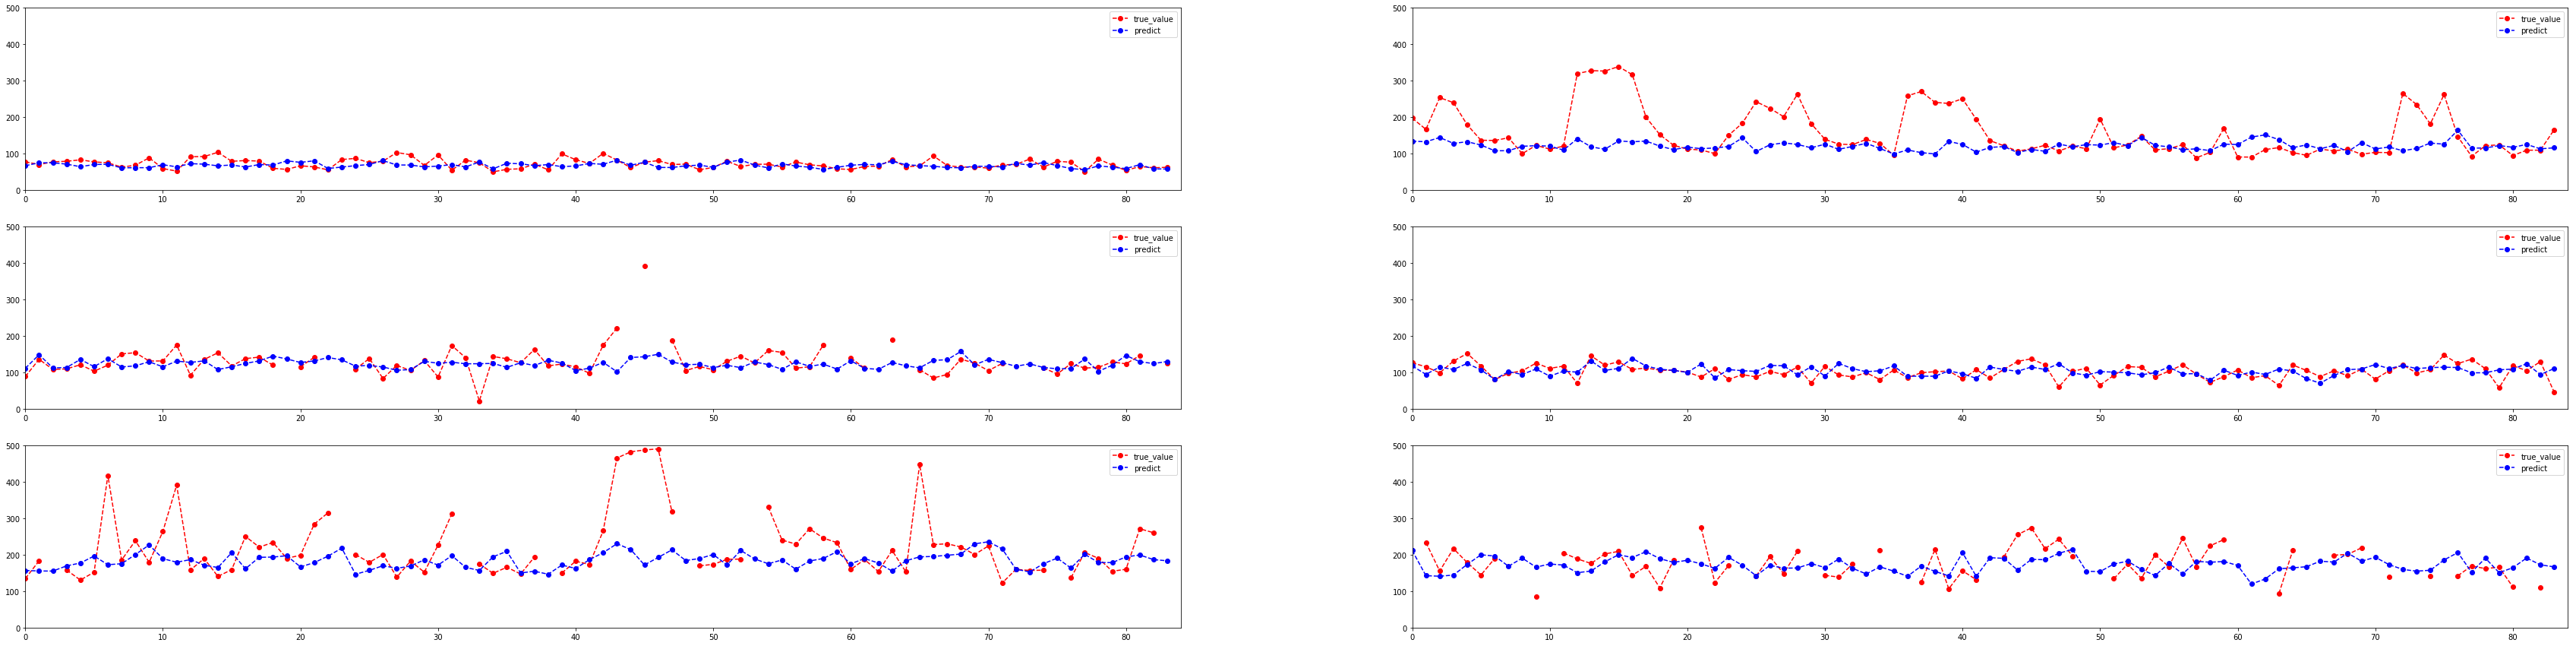

In [63]:
temp = temp1.groupby(['intersection_id', 'tollgate_id'])

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(60)
k = 1
for (k1,k2), group in temp:
    ax = fig.add_subplot(3,2,k)
    k += 1
    ax.plot(np.arange(len(group)), group['true_value'],'r--o', label='true_value')
    ax.plot(np.arange(len(group)), group['predict'],'b--o', label='predict')
    ax.set_xlim([0, 84])
    ax.set_ylim([0, 500])
    ax.legend()    

In [64]:
# 计算MAPE
temp1 = temp1.dropna()

temp = temp1.groupby(['intersection_id', 'tollgate_id'])
for (k1,k2), group in temp:
    print(k1,k2)
    mape = MAPE(group['true_value'], group['predict'])
    print(mape)

A 2
0.14546731580291367
A 3
0.245355554713093
B 1
0.22504864468496188
B 3
0.2022002361359348
C 1
0.22480892883161752
C 3
0.23289780951499095


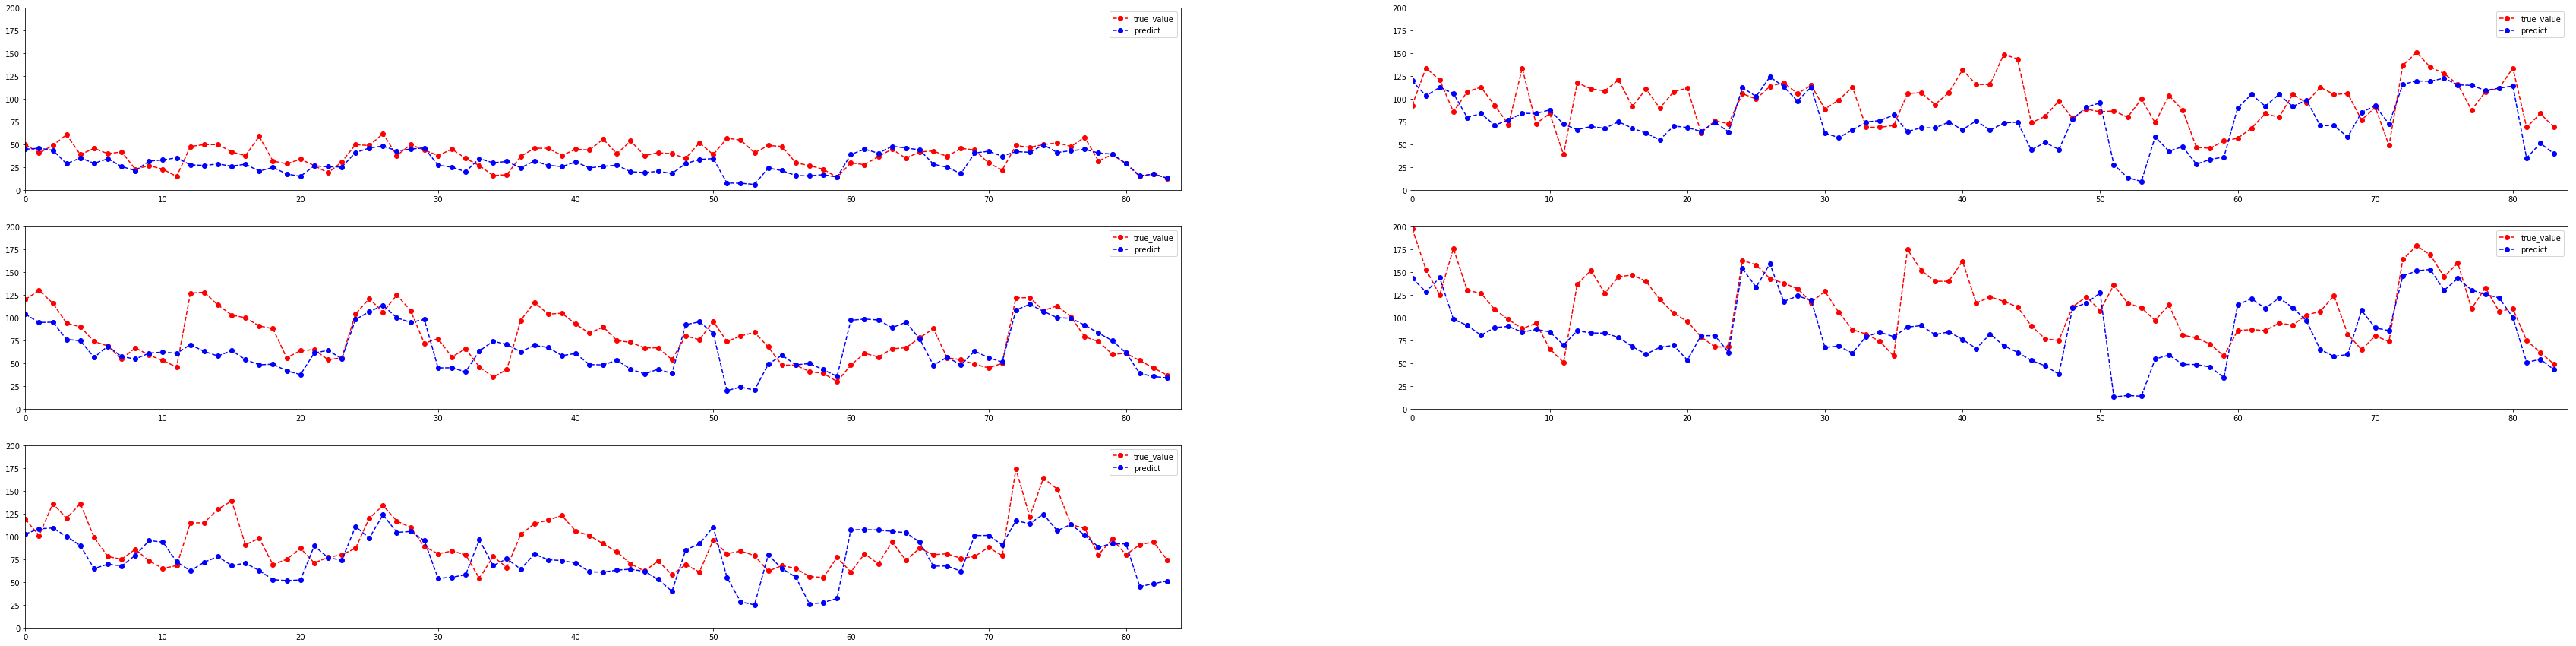

In [65]:
temp = temp2.groupby(['tollgate_id', 'direction'])

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(60)
k = 1
for (k1,k2), group in temp:
    ax = fig.add_subplot(3,2,k)
    k += 1
    ax.plot(np.arange(len(group)), group['true_value'],'r--o', label='true_value')
    ax.plot(np.arange(len(group)), group['predict'],'b--o', label='predict')
    ax.set_xlim([0, 84])
    ax.set_ylim([0, 200])
    ax.legend()    

In [66]:
# 计算MAPE
temp = temp2.groupby(['tollgate_id', 'direction'])
for (k1,k2), group in temp:
    print(k1,k2)
    mape = MAPE(group['true_value'], group['predict'])
    print(mape)

1 0
0.3292758185218974
1 1
0.28381553405252824
2 0
0.2871894477144397
3 0
0.29709648544035805
3 1
0.2710091294781549


### splitRF结果分析

In [67]:
time_predict = pd.read_csv('/home/godcedric/GitLocal/KDDCUP2017/submission_result/phase1.5/splitRF/travel_time_submission.csv')
volume_predict = pd.read_csv('/home/godcedric/GitLocal/KDDCUP2017/submission_result/phase1.5/splitRF/volume_submission.csv')

temp1 = pd.merge(time_predict, travel_time_targets, on=['intersection_id','tollgate_id','time_window'], how='left') 
temp2 = pd.merge(volume_predict, volume_targets, on=['tollgate_id','direction','time_window'], how='left')
temp1.columns = ['intersection_id', 'tollgate_id', 'time_window', 'predict', 'true_value']
temp2.columns = ['tollgate_id', 'time_window', 'direction', 'predict', 'true_value']

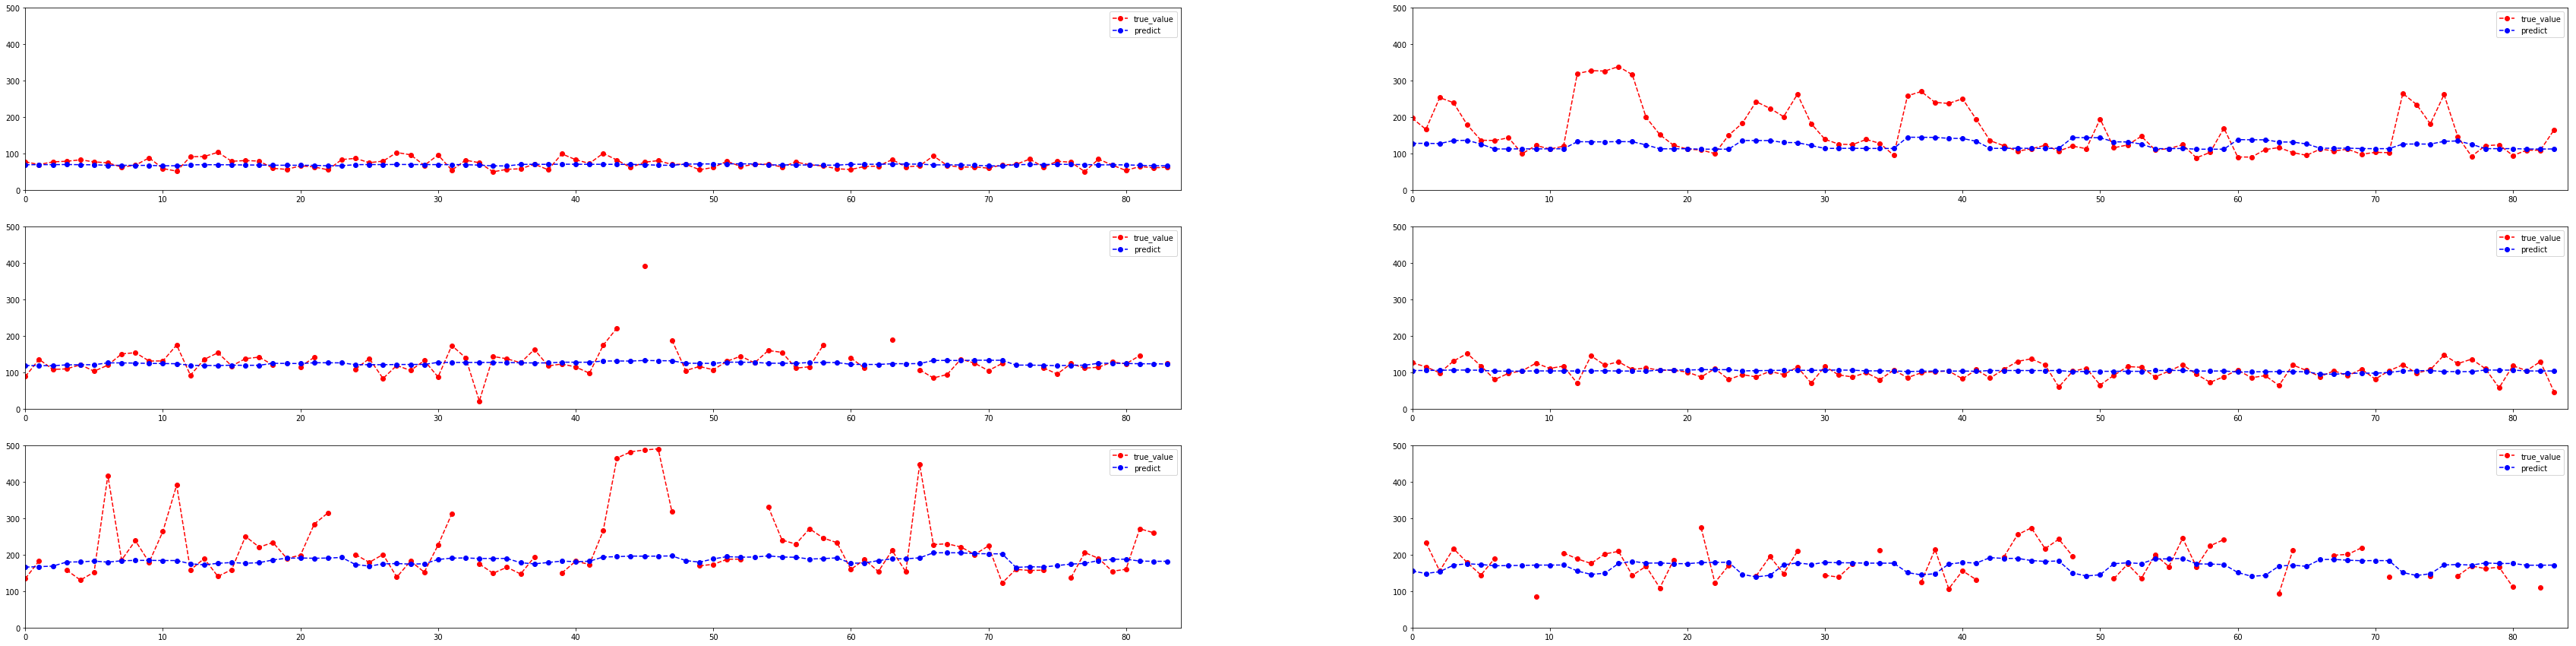

In [68]:
temp = temp1.groupby(['intersection_id', 'tollgate_id'])

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(60)
k = 1
for (k1,k2), group in temp:
    ax = fig.add_subplot(3,2,k)
    k += 1
    ax.plot(np.arange(len(group)), group['true_value'],'r--o', label='true_value')
    ax.plot(np.arange(len(group)), group['predict'],'b--o', label='predict')
    ax.set_xlim([0, 84])
    ax.set_ylim([0, 500])
    ax.legend()    

In [69]:
# 计算MAPE
temp1 = temp1.dropna()

temp = temp1.groupby(['intersection_id', 'tollgate_id'])
for (k1,k2), group in temp:
    print(k1,k2)
    mape = MAPE(group['true_value'], group['predict'])
    print(mape)

A 2
0.13717875964930007
A 3
0.2365187102024352
B 1
0.2236444251417122
B 3
0.17346036532267087
C 1
0.208075102789693
C 3
0.2276870585627963


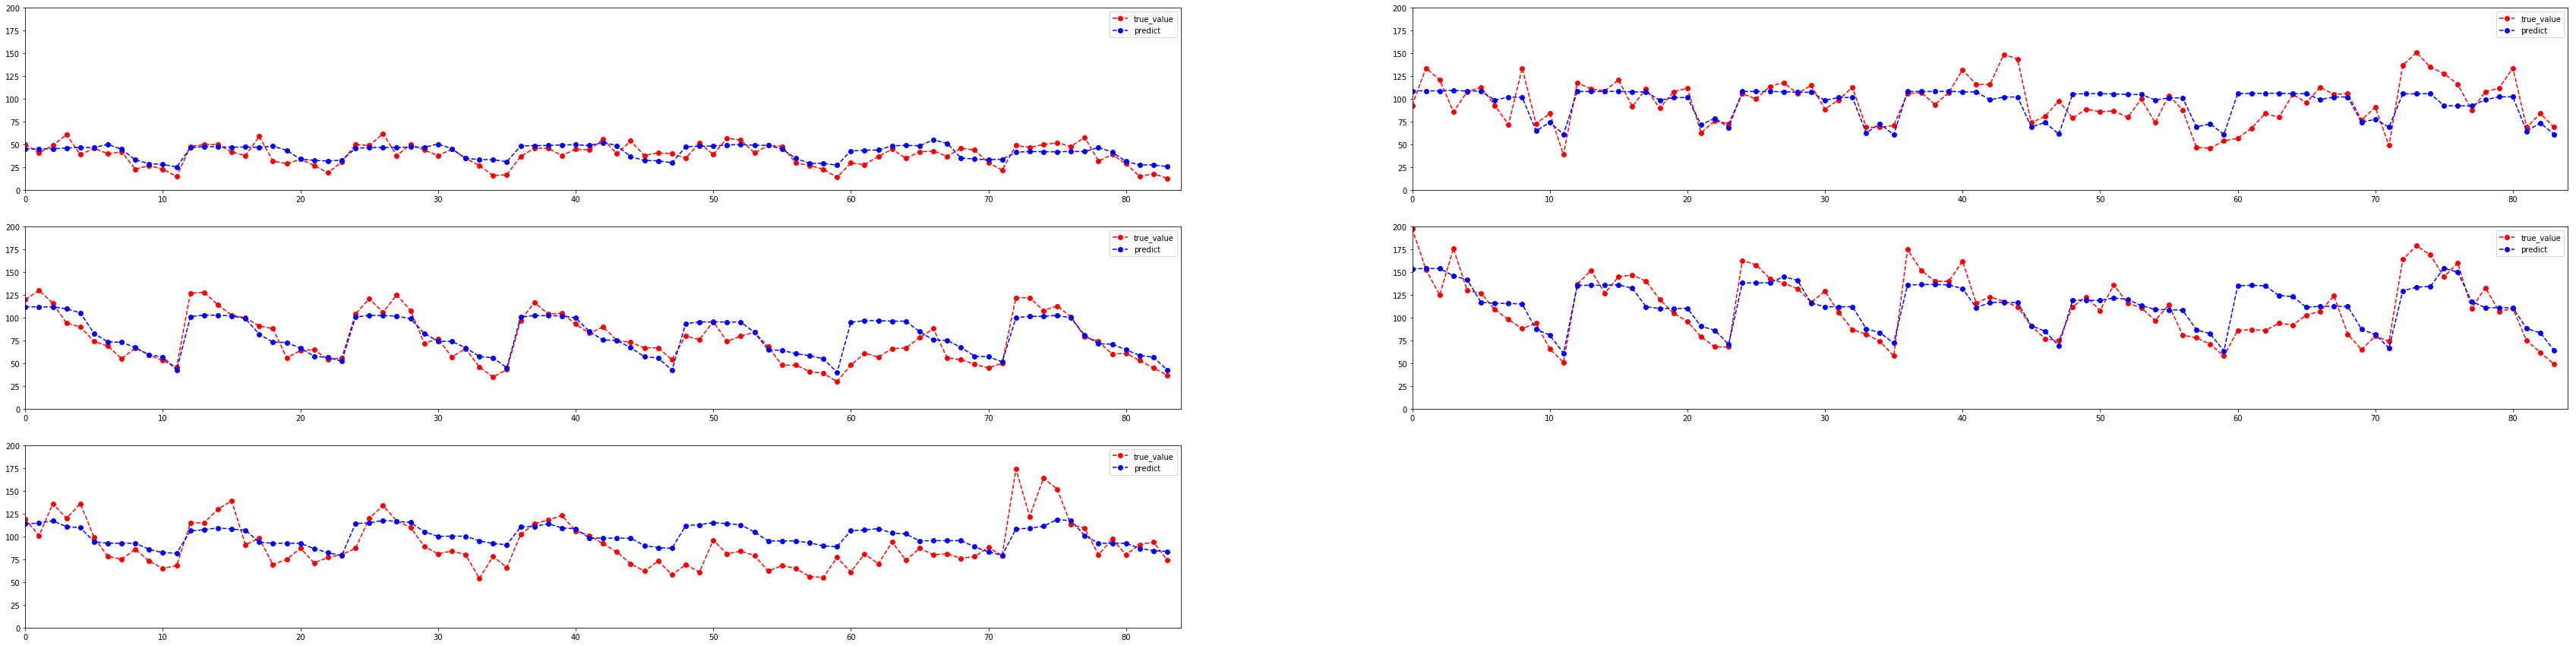

In [70]:
temp = temp2.groupby(['tollgate_id', 'direction'])

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(60)
k = 1
for (k1,k2), group in temp:
    ax = fig.add_subplot(3,2,k)
    k += 1
    ax.plot(np.arange(len(group)), group['true_value'],'r--o', label='true_value')
    ax.plot(np.arange(len(group)), group['predict'],'b--o', label='predict')
    ax.set_xlim([0, 84])
    ax.set_ylim([0, 200])
    ax.legend()    

In [71]:
# 计算MAPE
temp = temp2.groupby(['tollgate_id', 'direction'])
for (k1,k2), group in temp:
    print(k1,k2)
    mape = MAPE(group['true_value'], group['predict'])
    print(mape)

1 0
0.24823745561167387
1 1
0.16265914468877754
2 0
0.16778296529166806
3 0
0.14229979414267735
3 1
0.22238783406463264


### 融合结果分析

In [25]:
time_predict = pd.read_csv('/home/godcedric/GitLocal/KDDCUP2017/submission_result/phase1.5/combination/travel_time_submission.csv')
volume_predict = pd.read_csv('/home/godcedric/GitLocal/KDDCUP2017/submission_result/phase1.5/combination/volume_submission.csv')

temp1 = pd.merge(time_predict, travel_time_targets, on=['intersection_id','tollgate_id','time_window'], how='left') 
temp2 = pd.merge(volume_predict, volume_targets, on=['tollgate_id','direction','time_window'], how='left')
temp1.columns = ['intersection_id', 'tollgate_id', 'time_window', 'predict', 'true_value']
temp2.columns = ['tollgate_id', 'time_window', 'direction', 'predict', 'true_value']

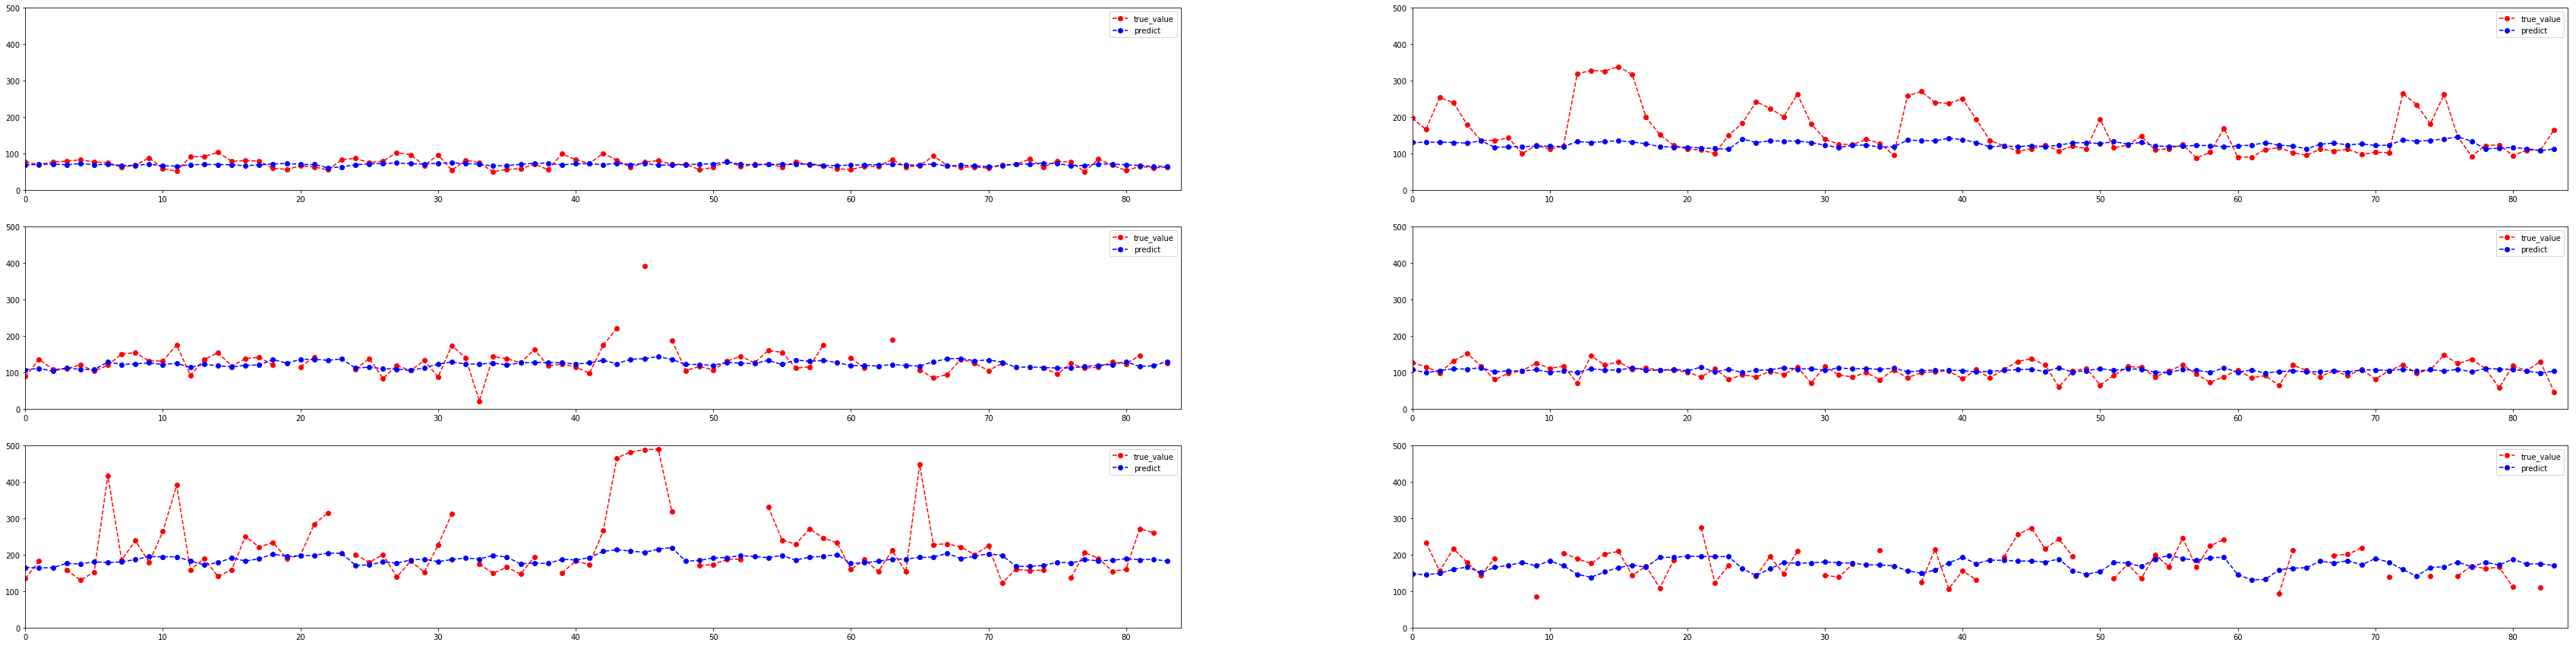

In [26]:
temp = temp1.groupby(['intersection_id', 'tollgate_id'])

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(60)
k = 1
for (k1,k2), group in temp:
    ax = fig.add_subplot(3,2,k)
    k += 1
    ax.plot(np.arange(len(group)), group['true_value'],'r--o', label='true_value')
    ax.plot(np.arange(len(group)), group['predict'],'b--o', label='predict')
    ax.set_xlim([0, 84])
    ax.set_ylim([0, 500])
    ax.legend()    

In [27]:
# 计算MAPE
temp1 = temp1.dropna()

temp = temp1.groupby(['intersection_id', 'tollgate_id'])
for (k1,k2), group in temp:
    print(k1,k2)
    mape = MAPE(group['true_value'], group['predict'])
    print(mape)

A 2
0.13156221774173352
A 3
0.2314194151718827
B 1
0.21340976761324507
B 3
0.1782101834139478
C 1
0.20638256297868954
C 3
0.23820053296315116


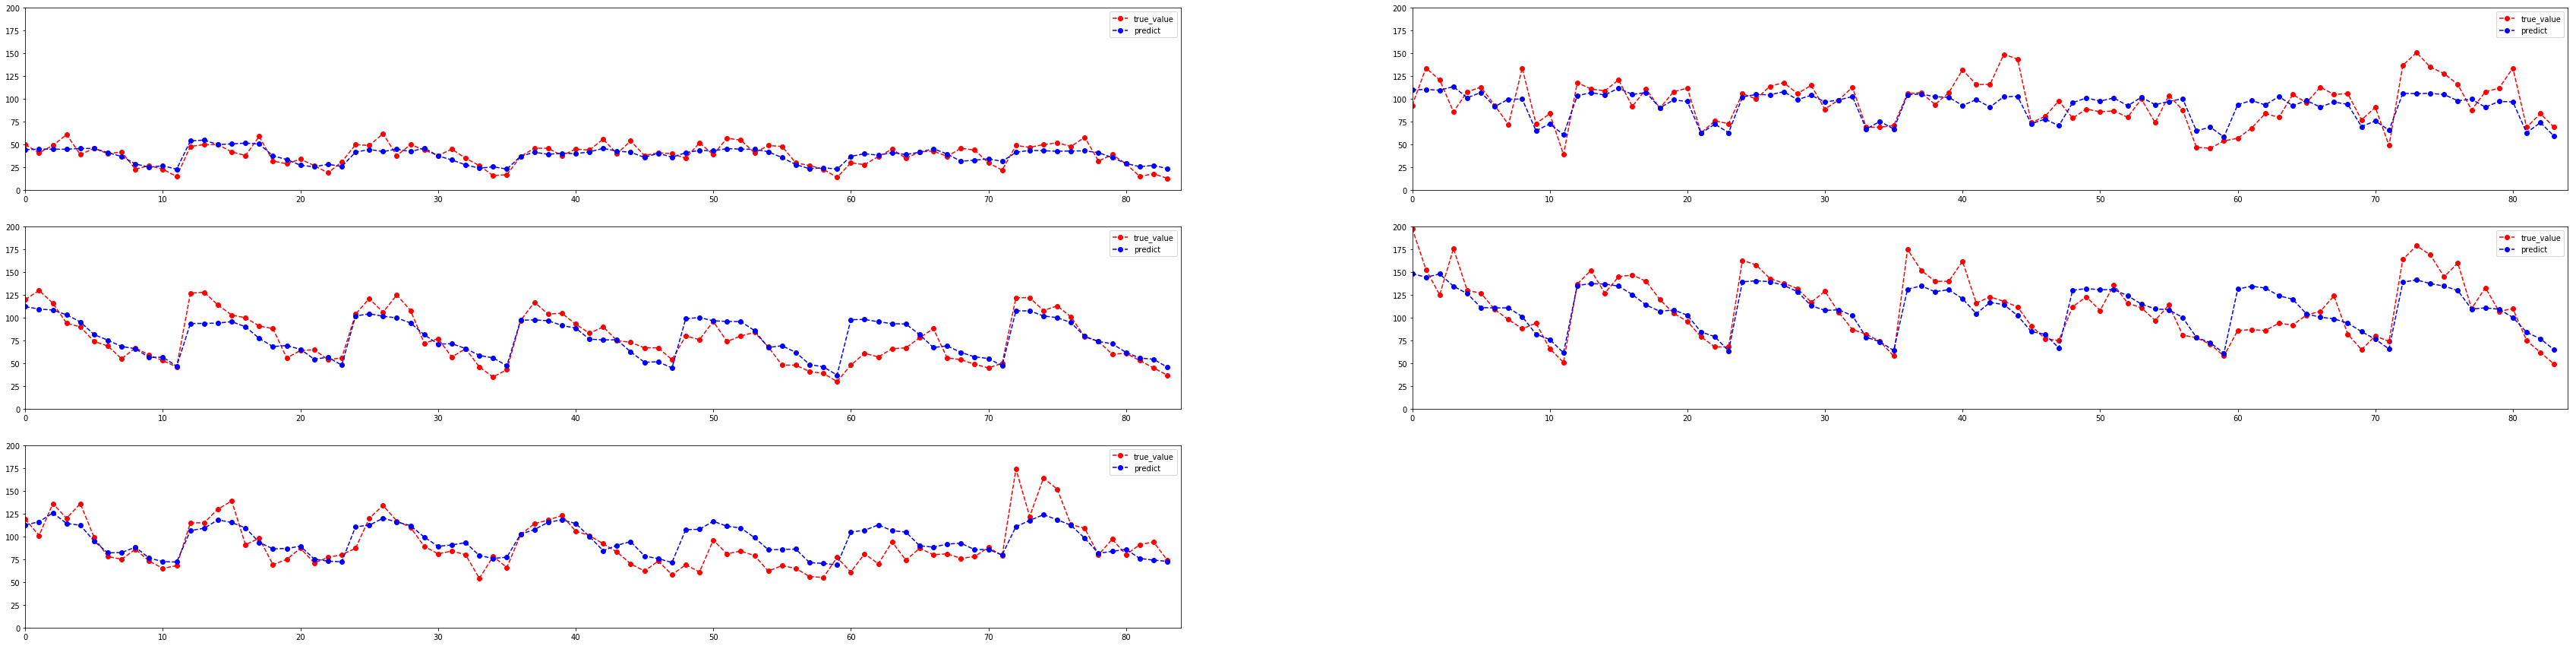

In [28]:
temp = temp2.groupby(['tollgate_id', 'direction'])

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(60)
k = 1
for (k1,k2), group in temp:
    ax = fig.add_subplot(3,2,k)
    k += 1
    ax.plot(np.arange(len(group)), group['true_value'],'r--o', label='true_value')
    ax.plot(np.arange(len(group)), group['predict'],'b--o', label='predict')
    ax.set_xlim([0, 84])
    ax.set_ylim([0, 200])
    ax.legend()    

In [29]:
# 计算MAPE
temp = temp2.groupby(['tollgate_id', 'direction'])
for (k1,k2), group in temp:
    print(k1,k2)
    mape = MAPE(group['true_value'], group['predict'])
    print(mape)

1 0
0.18382285008168783
1 1
0.15133790933628782
2 0
0.16854605060009997
3 0
0.1296532079572373
3 1
0.16153884053340137
